In [2]:
#1) Problem statement
#This project understands how the student's performance (test scores) is affected by other 
#variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation
#course.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [11]:
#lets see the top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape
# the data has 1000 rows and 8 columns

(1000, 8)

In [13]:
df.isnull().sum()
# there are no missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
df.duplicated().sum()
#no duplicates

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [18]:
df.keys()

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [19]:
print("categories in gender :")
print(df['gender'].unique())
print("---------------------------------------")

print("categories in race_ethnicity :")
print(df['race_ethnicity'].unique())
print("---------------------------------------")

print("categories in parental_level_of_education :")
print(df['parental_level_of_education'].unique())
print("---------------------------------------")

print("categories_in_lunch :")
print(df['lunch'].unique())
print("---------------------------------------")

print("categories in test preparation course :")
print(df['test_preparation_course'].unique())
print("---------------------------------------")

categories in gender :
['female' 'male']
---------------------------------------
categories in race_ethnicity :
['group B' 'group C' 'group A' 'group D' 'group E']
---------------------------------------
categories in parental_level_of_education :
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
---------------------------------------
categories_in_lunch :
['standard' 'free/reduced']
---------------------------------------
categories in test preparation course :
['none' 'completed']
---------------------------------------


In [21]:
#defining numerical and categorical features
categorical_features=[i for i in df.columns if df[i].dtype=='O' ]
numerical_features=[i for i in df.columns if df[i].dtype!='O' ]
print('categorical features are:{}'.format(categorical_features))
print('numerical features are:{}'.format(numerical_features))

categorical features are:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
numerical features are:['math_score', 'reading_score', 'writing_score']


In [22]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [40]:
df['Total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=(df['math_score']+df['reading_score']+df['writing_score'])/3

In [41]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [42]:
(df['math_score']==100)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math_score, Length: 1000, dtype: bool

In [43]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [44]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Exploring Data ( Visualization )

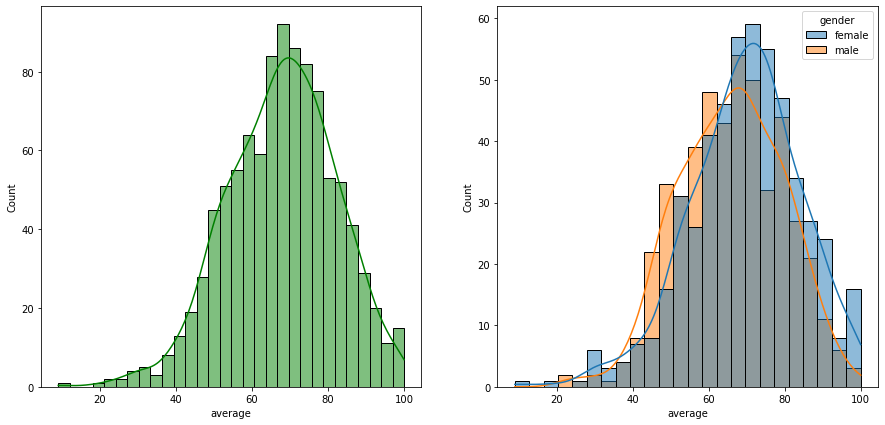

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

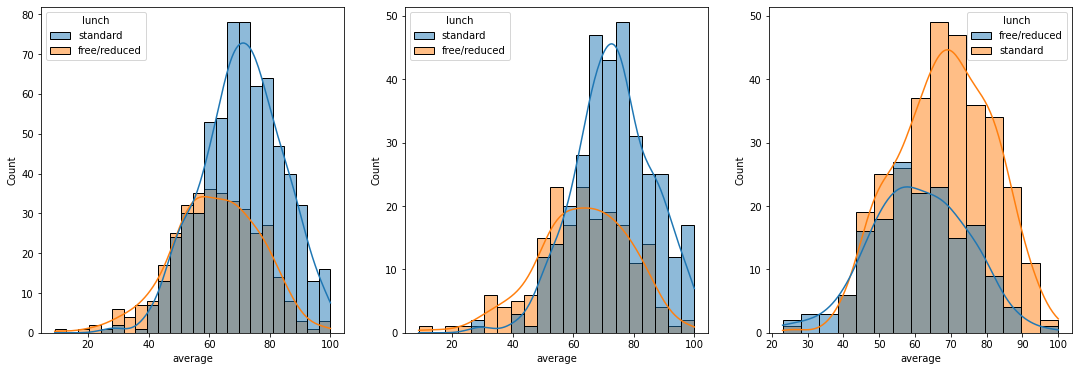

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

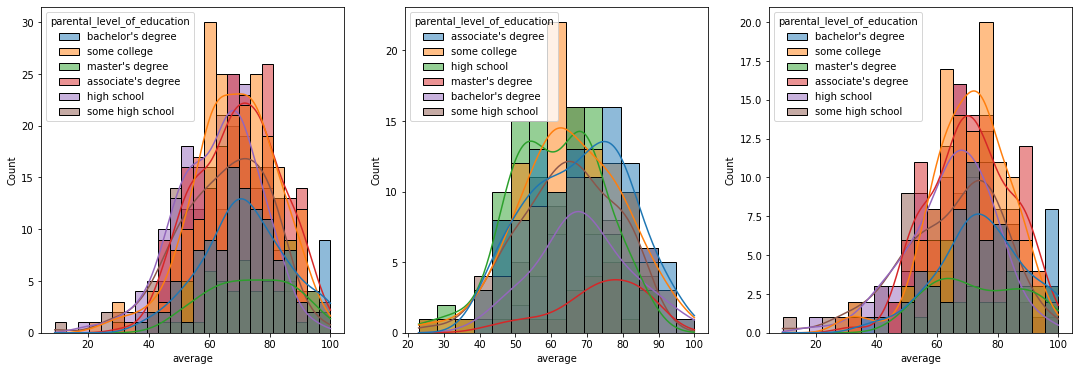

In [48]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

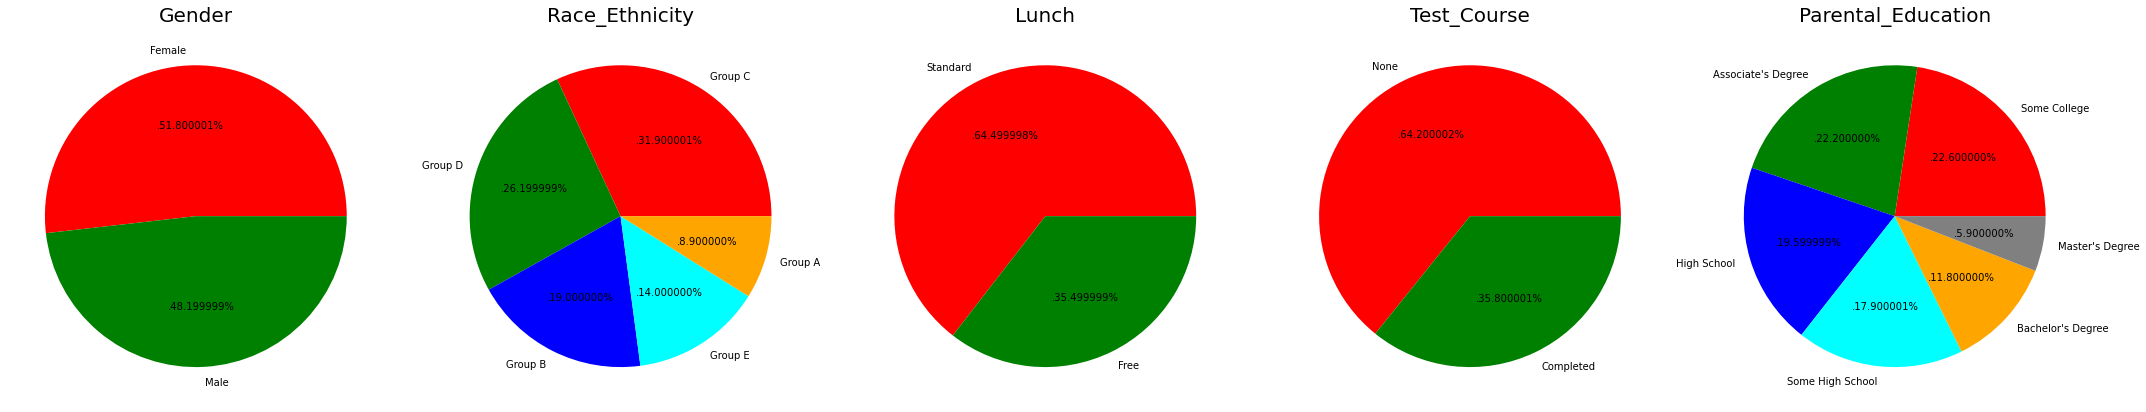

In [52]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

<AxesSubplot:xlabel='Average', ylabel='Count'>

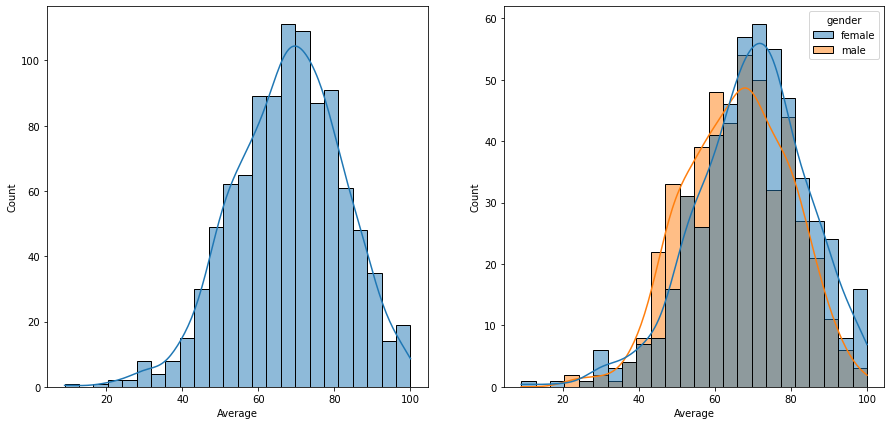

In [29]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x=df['Average'],kde=True)
plt.subplot(122)
sns.histplot(data=df,x=df['Average'],kde=True,hue='gender')

<AxesSubplot:xlabel='Average', ylabel='Count'>

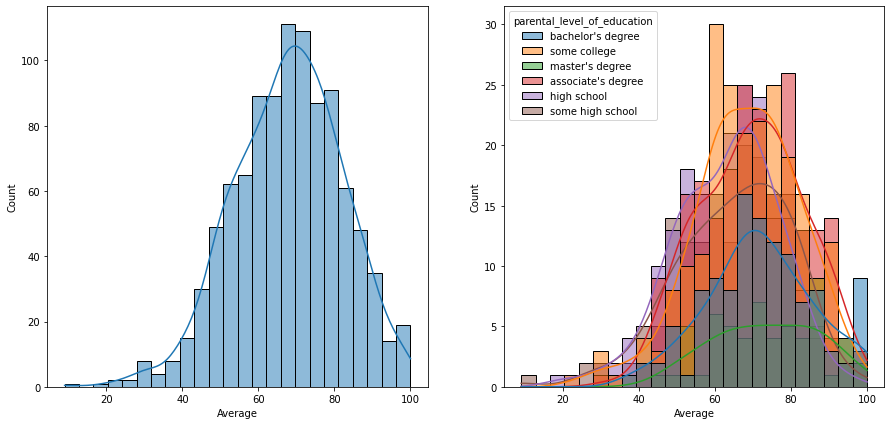

In [30]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x=df['Average'],kde=True)
plt.subplot(122)
sns.histplot(data=df,x=df['Average'],kde=True,hue='parental_level_of_education')

<AxesSubplot:title={'center':'writing_score'}, ylabel='writing_score'>

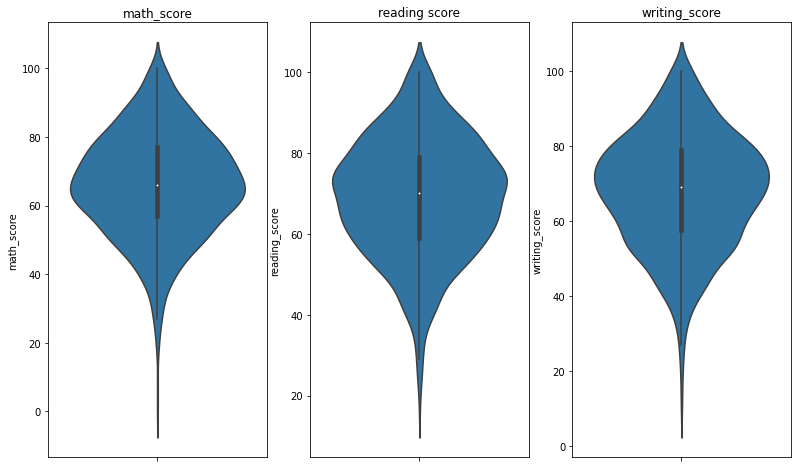

In [32]:
#Violin plot
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title("math_score")
sns.violinplot(y='math_score',data=df)

plt.subplot(1, 4, 2)
plt.title("reading score")
sns.violinplot(y='reading_score',data=df)

plt.subplot(1, 4, 3)
plt.title("writing_score")
sns.violinplot(y='writing_score',data=df)


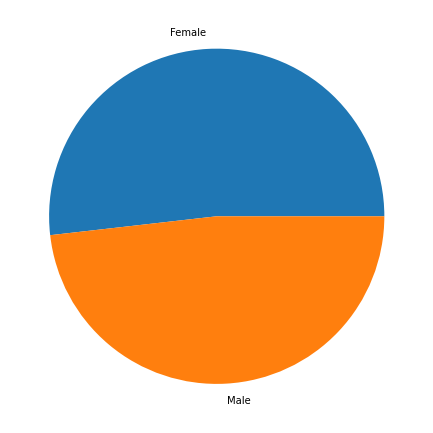

In [193]:
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels = 'Female', 'Male'
plt.pie(size,labels=labels)



plt.tight_layout()
plt.show()

<Figure size 1800x432 with 0 Axes>

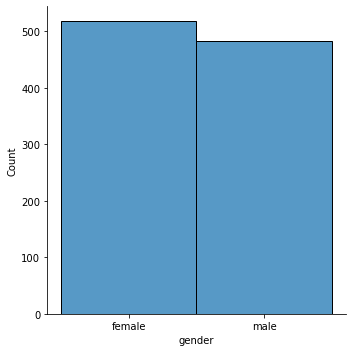

In [209]:
plt.figure(figsize=(25,6))
sns.displot(data=df,x='gender')

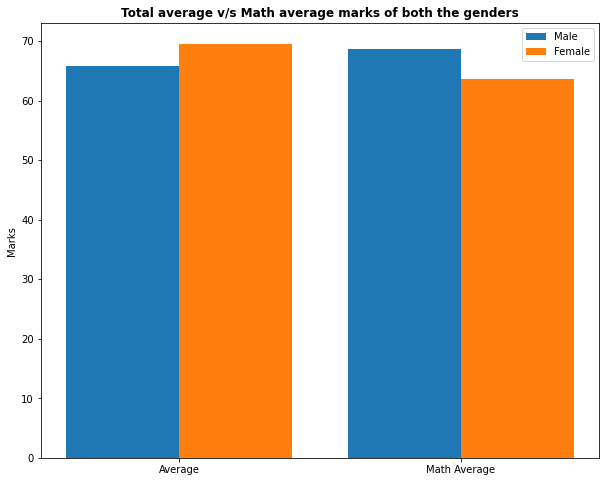

In [33]:
gender_group = df.groupby('gender').mean()
plt.figure(figsize=(10, 8))

X = ['Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [233]:
#gender

pd.DataFrame(df['Average'])

,Average
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


<Figure size 1800x432 with 0 Axes>

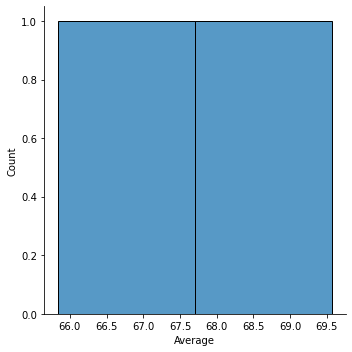

In [249]:
plt.figure(figsize=(25,6))

sns.displot(data=df,x=(df.groupby('gender').mean().Average))

In [34]:
df.groupby('gender').mean()

,math_score,reading_score,writing_score,Total score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [35]:
gender_group=(df.groupby('gender').mean().Average)
gender_group

gender
female    69.569498
male      65.837483
Name: Average, dtype: float64

In [53]:
gender_group[0]

69.56949806949807